# Example 2

This notebook computes the total cross sections for processes of interest.

In [185]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import DarkNews as dn
from DarkNews.GenLauncher import GenLauncher
from DarkNews import phase_space

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams


In [187]:
# targets
proton = dn.detector.NuclearTarget("H1")
C12 = dn.detector.NuclearTarget("C12")
Ar40 = dn.detector.NuclearTarget("Ar40")

In [188]:
# standard axis creator
def std_fig(axes_form=[0.1,0.15,0.88,0.74], transparent=True, figsize=(1.2*3.14961,1.4*2.3617)):
    fsize= 11
    rc('text', usetex=True)
    params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                    'figure.figsize':figsize }
    rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
    rcParams.update(params)

    fig = plt.figure()
    ax = fig.add_axes(axes_form)
    if transparent:
        ax.patch.set_alpha(0.0)

    return fig, ax

# standard saving function
def std_savefig(fig, path):
    fig.savefig(path, dpi=400)


In [189]:
bsm_model = dn.model.create_model(
    mzprime=0.5, 
    m4 = 0.2,
    Umu4=1e-4,
    epsilon=1e-3,
    s_mu4=1e-1,
    theta=1e-3,
    mhprime=0.5,
    mu_tr_mu4=1e-7
    )
calculator_hc = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= Ar40, helicity = 'conserving')
calculator_hf = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= Ar40, helicity = 'flipping')

Model:
	1 majorana heavy neutrino(s).
	kinetically mixed Z'
	higgs mixed h'
	1 non-zero scalar-neutrino coupling(s).
	1 non-zero transition magnetic moment(s).


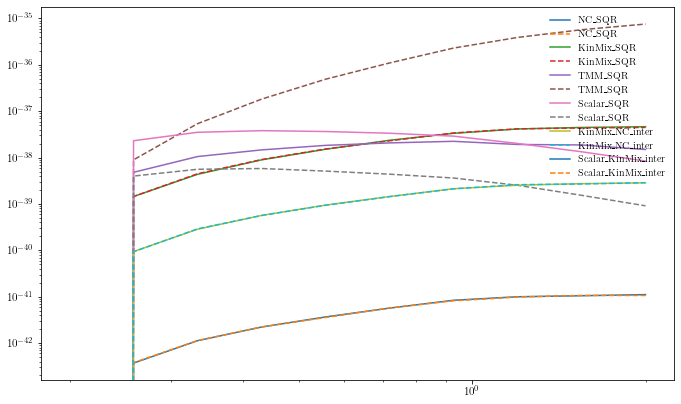

In [190]:
fig, ax = std_fig(axes_form=[0.1,0.15,0.88,0.74], transparent=True, figsize=(10,7))
Enu_range=np.geomspace(0.2,2,10)
for diagram in ['NC_SQR','KinMix_SQR','TMM_SQR','Scalar_SQR','KinMix_NC_inter','Scalar_KinMix_inter']:
# for diagram in ['Scalar_SQR','TMM_SQR']:
    ax.plot(Enu_range,calculator_hc.total_xsec(Enu_range, diagrams=[diagram],NEVAL=1000,NINT=10), label=diagram)
    ax.plot(Enu_range,calculator_hf.total_xsec(Enu_range, diagrams=[diagram],NEVAL=1000,NINT=10), label=diagram,ls='--')

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(frameon=False, loc='upper right')

In [193]:

bsm_model = dn.model.create_model(
    mzprime=1.25, 
    m4 = 0.1,
    Umu4=np.sqrt(1e-6),
    epsilon=10e-4,
    s_mu4=0,
    theta=0,
    mhprime=0.5,
    mu_tr_mu4=0,
    HNLtype='dirac',
    )

calculator_hc_coh = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= Ar40, helicity = 'conserving')

print(calculator_hc_coh.total_xsec(0.8, diagrams=['NC_SQR'],NEVAL=1000,NINT=20)/40)
print(calculator_hc_coh.total_xsec(0.8, diagrams=['KinMix_SQR'],NEVAL=1000,NINT=20)/40)
print(calculator_hc_coh.total_xsec(0.8, diagrams=['KinMix_NC_inter'],NEVAL=1000,NINT=20)/40)



Model:
	1 dirac heavy neutrino(s).
	kinetically mixed Z'
2.209871499375731e-41
2.363697972412791e-39
-4.579539952007173e-40


Model:
	1 dirac heavy neutrino(s).
	kinetically mixed Z'


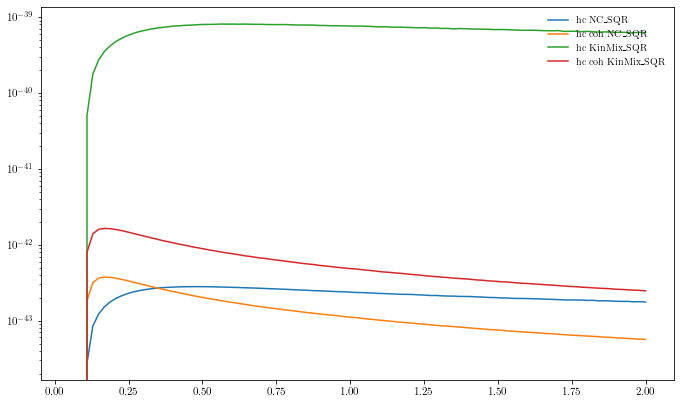

In [194]:
bsm_model = dn.model.create_model(
    mzprime=1.25, 
    m4 = 0.1,
    Umu4=np.sqrt(1e-6),
    epsilon=2e-4,
    s_mu4=0,
    theta=0,
    mhprime=0.5,
    mu_tr_mu4=0,
    HNLtype='dirac',
    )

calculator_hc_coh = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= Ar40, helicity = 'conserving')
calculator_hf_coh = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= Ar40, helicity = 'flipping')

calculator_hc = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'p-el', nuclear_target= Ar40, helicity = 'conserving')
calculator_hf = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'p-el', nuclear_target= Ar40, helicity = 'flipping')

fig, ax = std_fig(axes_form=[0.1,0.15,0.88,0.74], transparent=True, figsize=(10,7))
Enu_range=np.linspace(0.05,2,100)
for diagram in ['NC_SQR','KinMix_SQR']:
    ax.plot(Enu_range,1/Enu_range*calculator_hc.total_xsec(Enu_range, diagrams=[diagram],NEVAL=1000,NINT=20), label=f'hc {diagram}')
    # ax.plot(Enu_range,1/Enu_range*calculator_hf.total_xsec(Enu_range, diagrams=[diagram],NEVAL=1000,NINT=20), label=f'hf {diagram}',ls='--')
    ax.plot(Enu_range,1/Enu_range*1/40**2*calculator_hc_coh.total_xsec(Enu_range, diagrams=[diagram],NEVAL=5000,NINT=20), label=f'hc coh {diagram}')
    # ax.plot(Enu_range,1/Enu_range*1/18*calculator_hf_coh.total_xsec(Enu_range, diagrams=[diagram],NEVAL=1000,NINT=20), label=f'hf coh {diagram}',ls='--')

# ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(frameon=False, loc='upper right')

Model:
	1 dirac heavy neutrino(s).
	kinetically mixed Z'
	higgs mixed h'
	1 non-zero scalar-neutrino coupling(s).
	1 non-zero transition magnetic moment(s).


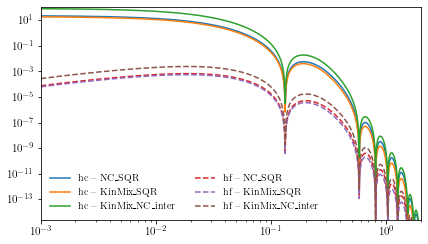

In [155]:
bsm_model = dn.model.create_model(
    mzprime=1.5, 
    m4 = 0.15,
    Umu4=1e-2,
    epsilon=1e-4,
    s_mu4=1e-1,
    theta=1e-3,
    mhprime=0.5,
    mu_tr_mu4=1e-7,
    HNLtype='dirac'
    )
calculator_hc = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= C12, helicity = 'conserving')
calculator_hf = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'coherent', nuclear_target= C12, helicity = 'flipping')

# q2_range=np.geomspace(1e-6,1,1000)
q2_range=np.geomspace(1e-3,2,1000)

fig, ax = std_fig(axes_form=[0.1,0.15,0.88,0.74], transparent=True, figsize=(6,4))
res_hc=calculator_hc.diff_xsec_Q2(Enu=0.8, Q2=q2_range,diagrams=['NC_SQR','KinMix_SQR','KinMix_NC_inter'])
res_hf=calculator_hf.diff_xsec_Q2(Enu=0.8, Q2=q2_range,diagrams=['NC_SQR','KinMix_SQR','KinMix_NC_inter'])
default=res_hc['NC_SQR']
for key,val in res_hc.items():
    ls = '-'
    if key=='total':
        continue
    else:
        ax.plot(q2_range, np.abs(val), label=f'hc -- {key}', ls=ls)

for key,val in res_hf.items():
    ls = '--'
    if key=='total':
        continue
    else:
        ax.plot(q2_range, np.abs(val), label=f'hf -- {key}', ls=ls)


ax.set_xlim(1e-3,2)
ax.set_ylim(np.max(default)/1e16,np.max(default)*5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(frameon=False, loc='lower left',ncol=2)

array([9.44982631e-08, 9.44948093e-08, 9.44913155e-08, 9.44877813e-08,
       9.44842063e-08, 9.44805900e-08, 9.44769319e-08, 9.44732315e-08,
       9.44694884e-08, 9.44657021e-08, 9.44618720e-08, 9.44579977e-08,
       9.44540786e-08, 9.44501142e-08, 9.44461041e-08, 9.44420476e-08,
       9.44379443e-08, 9.44337937e-08, 9.44295950e-08, 9.44253479e-08,
       9.44210518e-08, 9.44167060e-08, 9.44123101e-08, 9.44078634e-08,
       9.44033654e-08, 9.43988155e-08, 9.43942130e-08, 9.43895574e-08,
       9.43848481e-08, 9.43800844e-08, 9.43752657e-08, 9.43703914e-08,
       9.43654609e-08, 9.43604735e-08, 9.43554285e-08, 9.43503253e-08,
       9.43451632e-08, 9.43399416e-08, 9.43346597e-08, 9.43293169e-08,
       9.43239125e-08, 9.43184457e-08, 9.43129159e-08, 9.43073222e-08,
       9.43016641e-08, 9.42959407e-08, 9.42901514e-08, 9.42842952e-08,
       9.42783716e-08, 9.42723796e-08, 9.42663186e-08, 9.42601877e-08,
       9.42539861e-08, 9.42477131e-08, 9.42413677e-08, 9.42349492e-08,
      

In [11]:
res['Scalar_KinMix_inter']

array([-2.34660282e+03, -2.34385580e+03, -2.34108853e+03, -2.33830088e+03,
       -2.33549272e+03, -2.33266394e+03, -2.32981441e+03, -2.32694402e+03,
       -2.32405263e+03, -2.32114013e+03, -2.31820639e+03, -2.31525129e+03,
       -2.31227471e+03, -2.30927652e+03, -2.30625661e+03, -2.30321483e+03,
       -2.30015108e+03, -2.29706523e+03, -2.29395716e+03, -2.29082673e+03,
       -2.28767384e+03, -2.28449834e+03, -2.28130012e+03, -2.27807906e+03,
       -2.27483502e+03, -2.27156789e+03, -2.26827755e+03, -2.26496386e+03,
       -2.26162670e+03, -2.25826595e+03, -2.25488148e+03, -2.25147318e+03,
       -2.24804091e+03, -2.24458456e+03, -2.24110400e+03, -2.23759910e+03,
       -2.23406975e+03, -2.23051581e+03, -2.22693717e+03, -2.22333371e+03,
       -2.21970530e+03, -2.21605182e+03, -2.21237315e+03, -2.20866917e+03,
       -2.20493975e+03, -2.20118478e+03, -2.19740413e+03, -2.19359769e+03,
       -2.18976533e+03, -2.18590694e+03, -2.18202239e+03, -2.17811157e+03,
       -2.17417437e+03, -

In [ ]:
bsm_model = dn.model.create_model(mzprime=0.1, m4 = 0.01, Umu4=0.0, epsilon=0.0, mu_tr_mu4=1e-5)

calculator = dn.MC.XsecCalc(bsm_model = bsm_model, scattering_regime = 'p-el', nuclear_target= proton, helicity = 'conserving')
calculator.diff_xsec_Q2(Enu=0.1, Q2=0.01)


In [109]:
def compute_xsecs(m4, mzprime, **kwargs):
   
    #########################
    # Set BSM parameters
    bsm_model = dn.model.create_model(mzprime=mzprime, m4 = m4, **kwargs)
    
    TARGETS = [proton, C12, Ar40]
    REGIMES = ['coherent','p-el']
    HEL_CASES = ['conserving','flipping']

    myMCs = {}
    for target in TARGETS:
        for regime in REGIMES:
            for hel in HEL_CASES:
                key = f'{target.name}_{hel}_{regime}'
                myMCs[key] = dn.MC.XsecCalc(  
                    bsm_model = bsm_model, 
                    scattering_regime = regime,
                    nuclear_target= target,
                    helicity = hel)

    mc_lowT=myMCs['Ar40_conserving_coherent']

    enu_axis = np.geomspace(mc_lowT.Ethreshold*0.99, 20, 10)
    np.append(mc_lowT.Ethreshold*1.01, enu_axis)
    sigmas = {}
    for key, mc in myMCs.items():
        sigmas[key] = []
        print(key)
        for enu in enu_axis:
            sigmas[key].append(mc.total_xsec(enu))
        sigmas[key] = np.array(sigmas[key])
        mc.sigmas = sigmas[key]
        mc.enu_axis = enu_axis
    return myMCs

In [110]:
mcs_H_150 = compute_xsecs(0.150, 1.25)
# mcs_H_420 = compute_xsecs(0.420, 1.25)
# mcs_L_150 = compute_xsecs(0.150, 0.03)
# mcs_L_420 = compute_xsecs(0.420, 0.03)

Model:
	1 majorana heavy neutrino(s).
	kinetically mixed Z'
H1_conserving_coherent
H1_flipping_coherent
H1_conserving_p-el
H1_flipping_p-el
C12_conserving_coherent
C12_flipping_coherent
C12_conserving_p-el
C12_flipping_p-el
Ar40_conserving_coherent
Ar40_flipping_coherent
Ar40_conserving_p-el
Ar40_flipping_p-el


In [111]:
def plot_xsecs(theseMCs, regime = 'coherent'):
    fig, ax = std_fig(figsize=(10,4))

    all_args={
            f'H1_conserving_{regime}': {'color': 'black', 'ls': '-'},
            f'C12_conserving_{regime}': {'color': 'royalblue', 'ls': '-'},
            f'Ar40_conserving_{regime}': {'color': 'violet', 'ls': '-'},
            f'H1_flipping_{regime}': {'color': 'black', 'ls': '--'},
            f'C12_flipping_{regime}': {'color': 'royalblue', 'ls': '--'},
            f'Ar40_flipping_{regime}': {'color': 'violet', 'ls': '--'},
            }    
    
    for key, mc in theseMCs.items():
        if regime in key:
            if regime == 'coherent' and "H1" in key:
                continue
            else:
                sigmas = mc.sigmas
                enu_axis = np.geomspace(mc.Ethreshold*0.99, 20, len(sigmas))

                ls = '-' if ('conserving' in key) else '--'
                args = all_args[key]
                p = mc.ups_case.TheoryModel
                norm = (p.Umu4*p.epsilon*dn.const.eQED*p.gD*p.UD4*mc.target.Z)**2
#                 print(norm/(mc.ups_case.Vij**2*mc.ups_case.Vhad**2))
                if 'conserving' in key:
                    ax.plot(enu_axis, sigmas/norm, label=key.replace("_", " ").replace("conserving", "HC").replace("coherent", "coh"), **args)
                else:
                    ax.plot(enu_axis, sigmas/norm, **args)

    ax.set_title(fr'$m_{{Z^\prime}}= {mc.ups_case.mzprime:.2f}$ GeV,  $m_4 = {mc.ups_case.m_ups*1e3:.0f}$ MeV')
    ax.set_yscale("log")
    # ax.set_xscale("log")

    ax.set_xlabel(r"$E_\nu$ (GeV)")
    ax.set_ylabel(r"$\sigma/(Z e \epsilon V_{\mu 4})^2$ (cm$^2$)", fontsize=12)
    ax.set_xlim(0.1,np.max(enu_axis))
#     ax.set_ylim(1e-34,1e-26)

    ax.legend(loc="best", frameon=False)
    ax.grid(which='major', lw=0.5)

    # fig.savefig(f"plots/xsecs/example_3+1_{mc.ups_case.mzprime:.2f}_{mc.ups_case.m_ups*1e3:.0f}_{regime}.pdf")

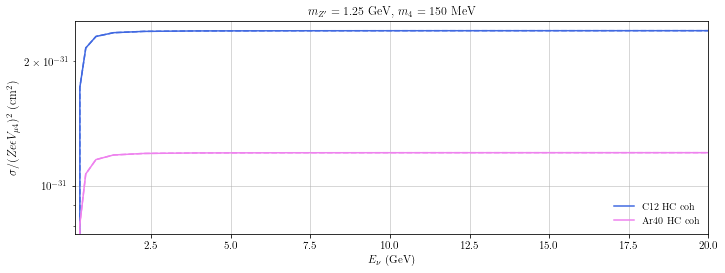

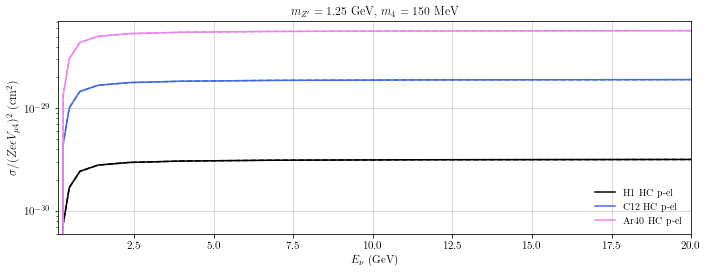

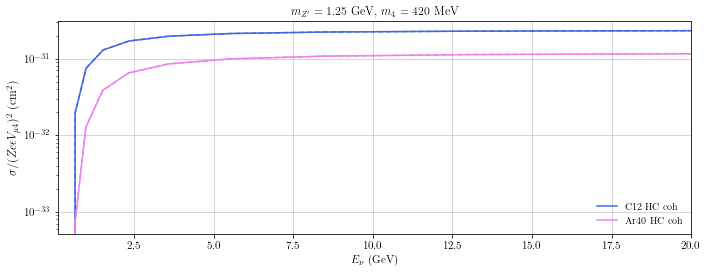

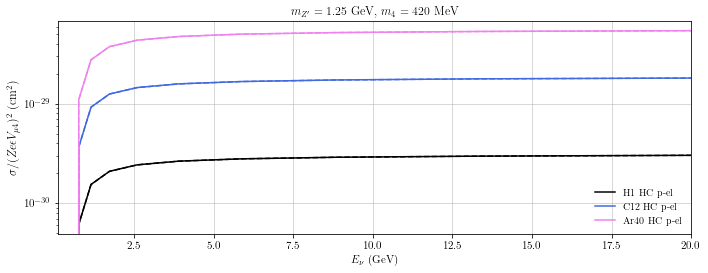

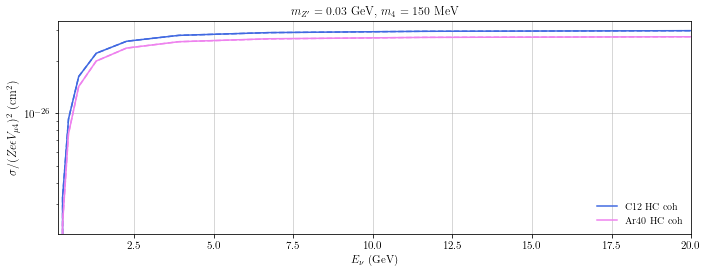

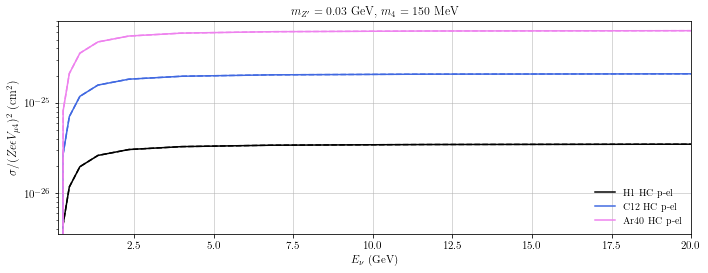

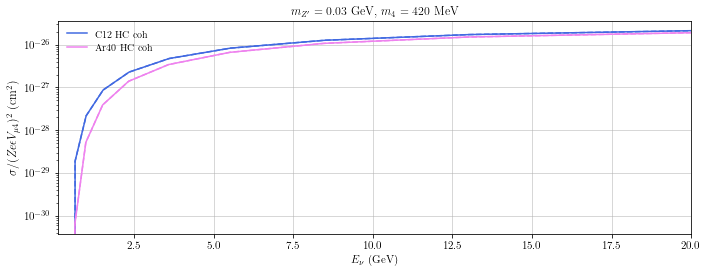

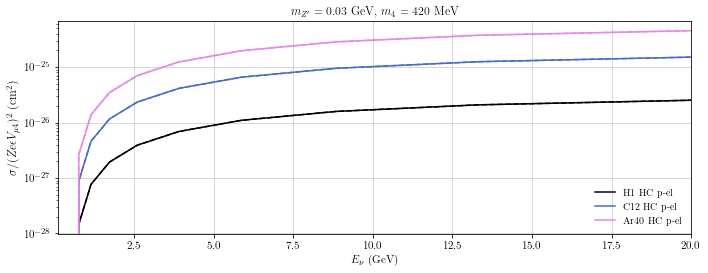

In [112]:
plot_xsecs(mcs_H_150, regime = 'coherent')
plot_xsecs(mcs_H_150, regime = 'p-el')
 
plot_xsecs(mcs_H_420, regime = 'coherent')
plot_xsecs(mcs_H_420, regime = 'p-el')
 
plot_xsecs(mcs_L_150, regime = 'coherent')
plot_xsecs(mcs_L_150, regime = 'p-el')
 
plot_xsecs(mcs_L_420, regime = 'coherent')
plot_xsecs(mcs_L_420, regime = 'p-el')

#### Dirac vs Majorana

In [61]:
mcs_L_420

{'H1_conserving_coherent': <DarkNews.MC.XsecCalc at 0x12d5ce0a0>,
 'H1_flipping_coherent': <DarkNews.MC.XsecCalc at 0x12d5ce5b0>,
 'H1_conserving_p-el': <DarkNews.MC.XsecCalc at 0x12d5ce730>,
 'H1_flipping_p-el': <DarkNews.MC.XsecCalc at 0x12d5ce880>,
 'C12_conserving_coherent': <DarkNews.MC.XsecCalc at 0x12d5cea00>,
 'C12_flipping_coherent': <DarkNews.MC.XsecCalc at 0x12d5ceaf0>,
 'C12_conserving_p-el': <DarkNews.MC.XsecCalc at 0x12d5cebe0>,
 'C12_flipping_p-el': <DarkNews.MC.XsecCalc at 0x12d5cecd0>,
 'Ar40_conserving_coherent': <DarkNews.MC.XsecCalc at 0x12d5cef40>,
 'Ar40_flipping_coherent': <DarkNews.MC.XsecCalc at 0x12d5cf160>,
 'Ar40_conserving_p-el': <DarkNews.MC.XsecCalc at 0x12d5cf1f0>,
 'Ar40_flipping_p-el': <DarkNews.MC.XsecCalc at 0x12d5cf280>}

In [62]:
mcs_L_420['C12_conserving_coherent'].diff_xsec_Q2(Enu=11, Q2 = 0.001)

array([7.05370723e+09])

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

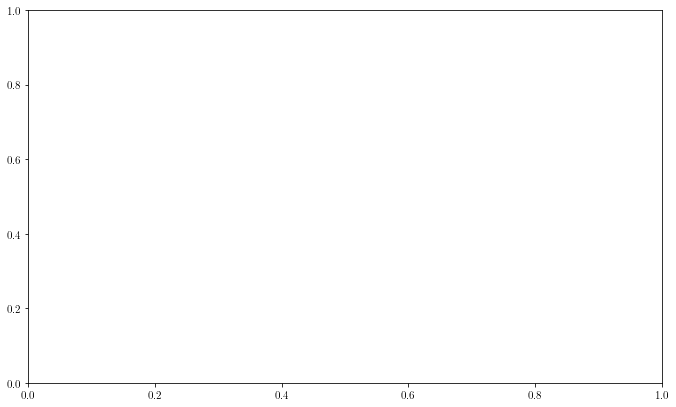

In [113]:
from DarkNews import phase_space as ps
Enu = 2
fig, ax = std_fig(axes_form=[0.1,0.15,0.88,0.74], transparent=True, figsize=(10,7))
def plot_diff_xsec_Q2(MCs, Enu):
    
    for key, mc in MCs.items():
        Q2range=np.geomspace(ps.upscattering_Q2min(Enu, mc.ups_case.m_ups, mc.ups_case.MA),
                    ps.upscattering_Q2max(Enu, mc.ups_case.m_ups, mc.ups_case.MA),
                    1000)
        ax.plot(Q2range, mc.diff_xsec_Q2(Enu=Enu, Q2 = Q2range), label = f'{key}'.replace('_', ' ').replace('flipping','HF').replace('conserving','HC').replace('coherent','coh'))


plot_diff_xsec_Q2(mcs_L_150, Enu)
plot_diff_xsec_Q2(mcs_L_420, Enu)
ax.legend(loc='best', frameon=False)
ax.set_yscale("log")
ax.set_xscale("log")
# ax.set_ylim(1,1e12)